In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.coordinates as coord
from astropy.table import Table
from astropy.io import fits

In [2]:
plt.style.use('notebook')

In [5]:
tl = Table(fits.getdata('../data/pal5_lead_samples.fits'))
tt = Table(fits.getdata('../data/pal5_trail_samples.fits'))

In [10]:
for k in tl.colnames:
    print(k, np.shape(tl[k]))

ln_a (13, 65536)
a (13, 65536)
mu_s (13, 65536)
lnstd_s (13, 65536)
std_s (13, 65536)
bg_p1 (13, 65536)
bg_p2 (13, 65536)
bg_p3 (13, 65536)
phi1_bin_c (13,)
N (13,)


In [40]:
tm = Table.read('../data/WidthTrack_bar1e10.txt', format='ascii')

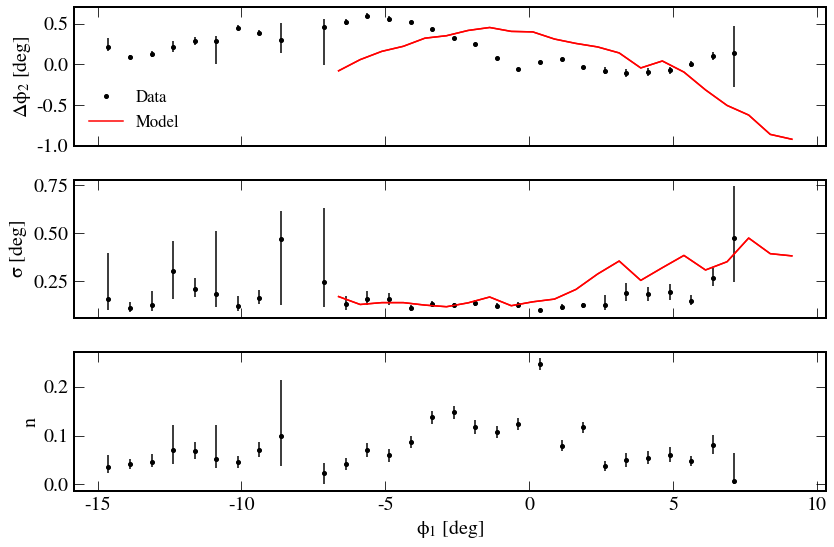

In [46]:
fig, ax = plt.subplots(3,1,figsize=(12,8), sharex=True)

sn = [1,-1]
labels = ['$\Delta\phi_2$ [deg]', '$\sigma$ [deg]', 'n']
ind = [3,2]
for e, t in enumerate([tl, tt]):
    mask = np.median(t['a'] * t['N'][:, None], axis=1) > 20.
    
    for i, l in enumerate(['mu_s', 'std_s', 'a']):
        plt.sca(ax[i])
        med = np.median(t[l], axis=1)
        em = med - np.percentile(t[l], 16, axis=1)
        ep = np.percentile(t[l], 84, axis=1) - med
        
        plt.plot(sn[e]*t['phi1_bin_c'][mask], med[mask], 'ko', ms=4, label='Data')
        plt.errorbar(sn[e]*t['phi1_bin_c'][mask], med[mask], yerr=[em[mask], ep[mask]], fmt='none', color='k',
                    label='')
        
        if i<2:
            plt.plot(tm['col1']-7, tm['col{:1d}'.format(ind[i])], 'r-', label='Model')
        
        plt.ylabel(labels[i])

    if e==0:
        plt.sca(ax[0])
        plt.legend(frameon=False, fontsize='small', loc=3)
        
plt.sca(ax[2])
plt.xlabel('$\phi_1$ [deg]')

plt.tight_layout()
plt.savefig('../plots/track_profiles.png')